# **이변량분석 : 숫자 vs 숫자**

* 우리가 사용하는 도구는...
    * 두 변수와의 관계를 살펴보기 위해, 두가지 도구(시각화, 수치화)를 이용합니다.
    * 이 도구들도 각각 한계가 있습니다. 보이는게 전부가 아님을 꼭 명심하세요! 
    * 특히 수치화 도구(가설검정 도구)는 많은 가정들이 전제 됩니다. 
    * 그래서 이번 과정에서는 그 도구를 사용하는 데에 집중합니다. 


## **1.환경준비**

* 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 뉴욕 공기 오염도


In [3]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


----

## **2.시각화 : 산점도**

* 상관 분석에 대해서 이야기 해봅시다.
    * 상관 분석은 연속형 변수 X에 대한 연속형 변수 Y의 관계를 분석할 때 사용됩니다.
    * Scatter를 통해 시각화 합니다.
* 가설 : 온도(x)가 상승하면 아이스크림 판매량(y)을 증가할까?
    * 어떤 관계가 보이나요?
    * 얼마나 강한 관계인가요?
* 숫자 vs 숫자를 비교할 때 중요한 관점이 **'직선'(Linearity)** 입니다.



<img src='https://github.com/DA4BAM/image/blob/main/%EC%82%B0%EC%A0%90%EB%8F%84_ex.png?raw=true' width=500/>

### **(1) 산점도**

* 문법
    * plt.scatter( x축 값, y축 값 )
    * plt.scatter( ‘x변수’, ‘y변수’, data = dataframe이름) 

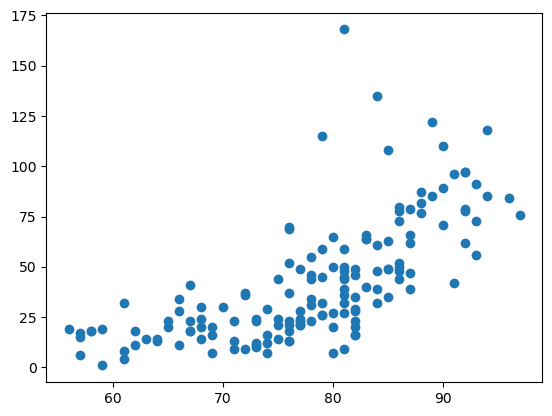

In [8]:
plt.scatter(air['Temp'], air['Ozone'])
plt.show()

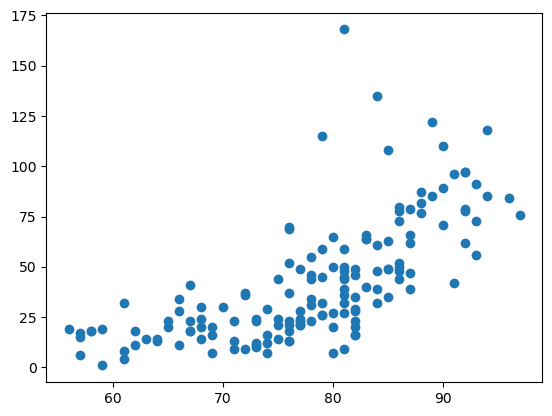

In [10]:
plt.scatter('Temp', 'Ozone', data = air)
plt.show()

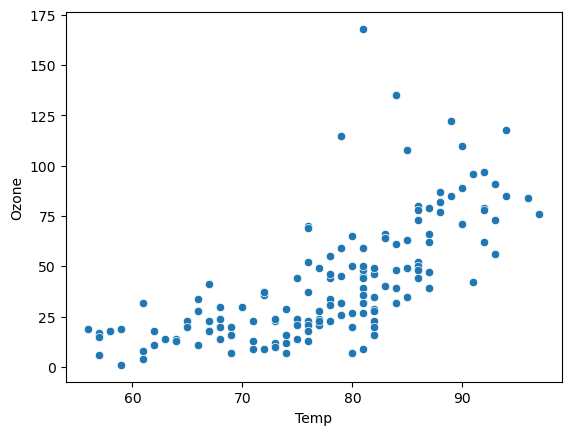

In [11]:
sns.scatterplot(x='Temp', y='Ozone', data = air)
plt.show()

그래프를 그렸으면, 그래프로부터 정보를 파악해야 합니다.  

무엇이 보이나요?

In [ ]:
선형관계, Temp가 올라갈수록 범위가 넓어지는 듯함

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

* [문1] Temp, Wind, Solar.R 과 Ozone 과의 관계를 시각화 해 봅시다.

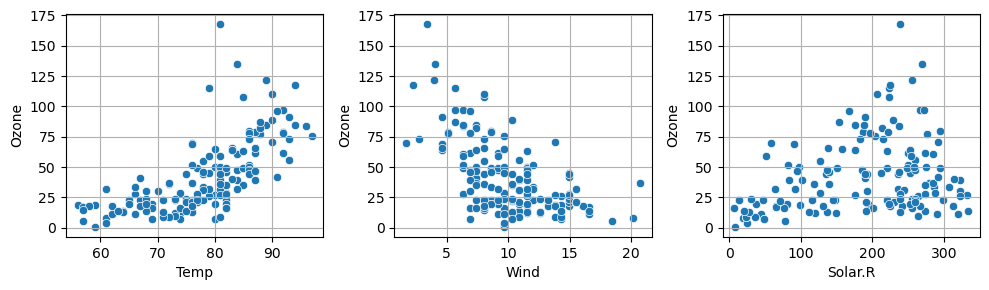

In [21]:
plt.figure(figsize = (10,3))
plt.subplot(1,3, 1)
sns.scatterplot( x= 'Temp', y = 'Ozone', data = air)
plt.grid()

plt.subplot(1,3, 2)
sns.scatterplot( x= 'Wind', y = 'Ozone', data = air)
plt.grid()

plt.subplot(1,3, 3)
sns.scatterplot( x= 'Solar.R', y = 'Ozone', data = air)
plt.grid()

plt.tight_layout()
plt.show()

* [문2] Ozone과 가장 강한 관계의 x변수는?

In [ ]:
Temp 아니면 Wind..?

* 두 변수의 관계
    * 산점도에서 또렷한 패턴이 보인다면, 강한 관계로 볼 수 있습니다.
    * 특히, 직선의 패턴이 보인다면

<img src='https://cqeacademy.com/wp-content/uploads/2018/06/Scatter-Plots-and-Correlation-Examples.png' width=800/>

### **(2) pairplot 한꺼번에 시각화**

* 숫자형 변수들에 대한 산점도를 한꺼번에 그려줍니다.
* 그러나 **시간이 많이**걸립니다.

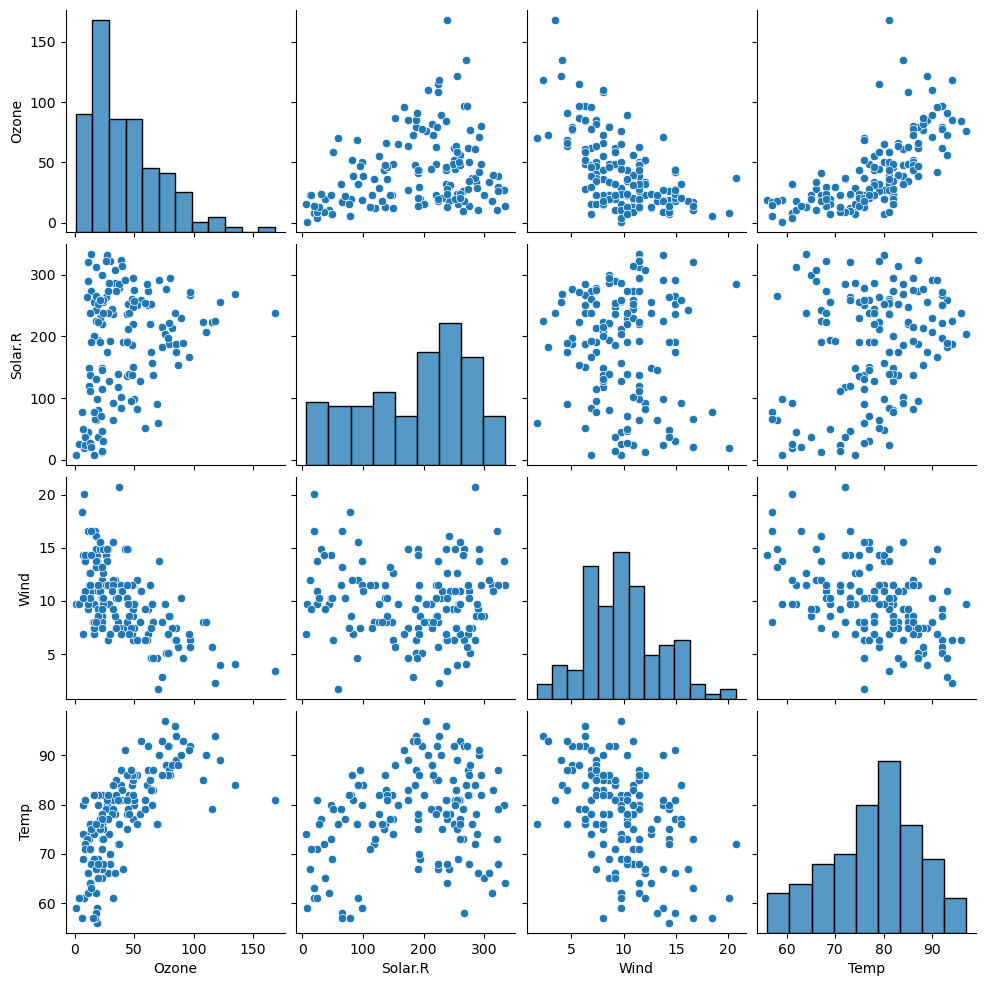

In [36]:
sns.pairplot(air)
plt.show()

###  **(3) (추가) jointplot, regplot**

* jointplot은 산점도와 각각의 히스토그램을 함께 보여줍니다.

* Temp --> Ozone

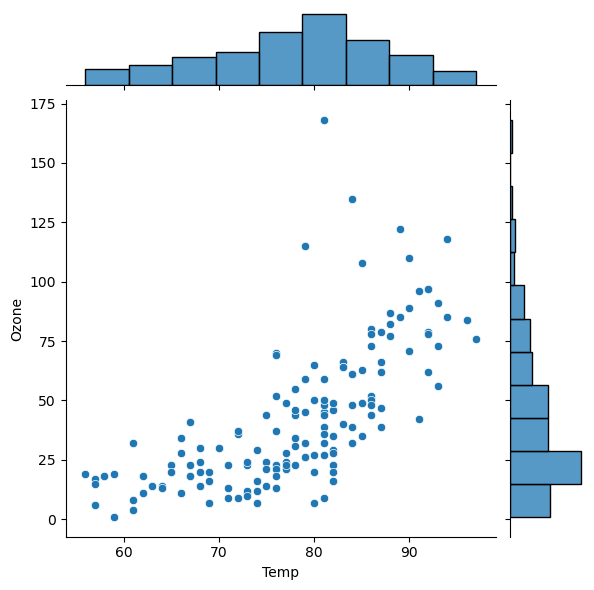

In [23]:
sns.jointplot(x='Temp', y='Ozone', data = air)
plt.show()

* Wind --> Ozone

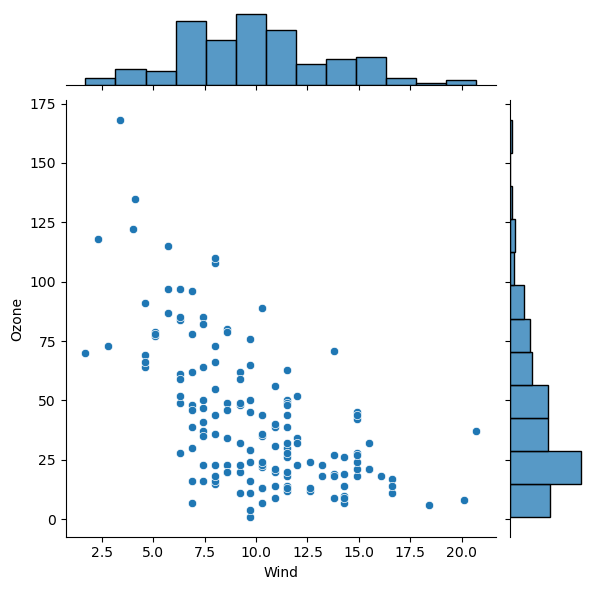

In [25]:
sns.jointplot(x='Wind', y='Ozone', data = air)
plt.show()

* Solar.R --> Ozone

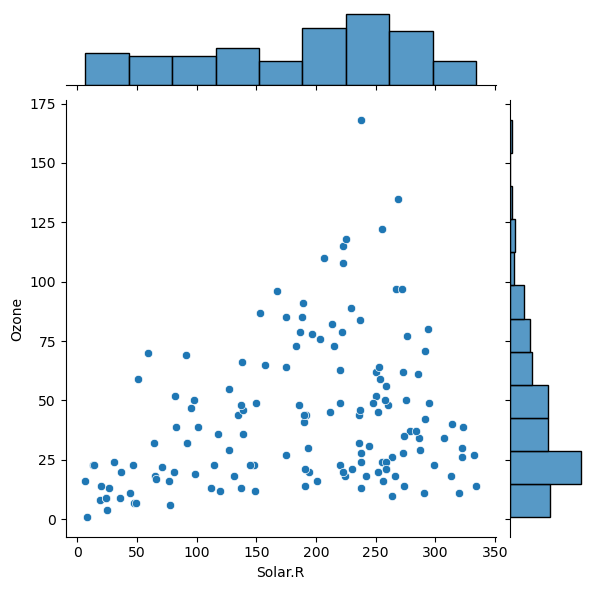

In [28]:
sns.jointplot(x='Solar.R', y='Ozone', data = air)
plt.show()

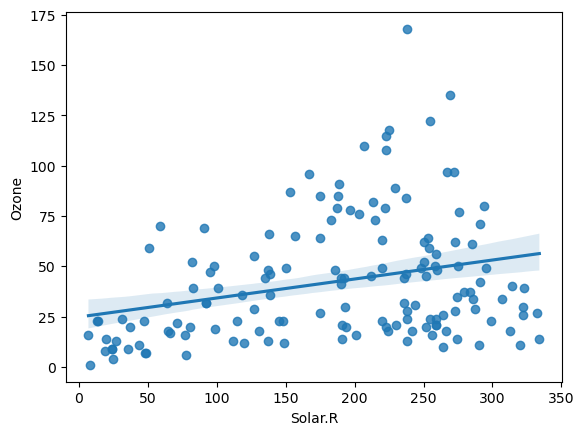

In [29]:
sns.regplot(x='Solar.R', y='Ozone', data = air)
plt.show()

## **3.수치화 : 상관분석**

### (1) 상관계수, p-value

* 상관계수 𝑟
    * 공분산을 표준화 한 값
    * -1 ~ 1 사이의 값
    * -1, 1에 가까울 수록 강한 상관관계를 나타냄.

* 경험에 의한 대략의 기준(절대적인 기준이 절대 아닙니다.)
    * 강한 : 0.5 < |𝑟| ≤ 1
    * 중간 : 0.2 < |𝑟| ≤ 0.5
    * 약한 : 0.1 < |𝑟| ≤ 0.2
    * (거의)없음 : |𝑟| ≤ 0.1
    

In [32]:
import scipy.stats as spst

In [34]:
# 상관계수와 p-value 
spst.pearsonr(air['Temp'], air['Ozone'])

PearsonRResult(statistic=0.6833717861490114, pvalue=2.197769800200284e-22)

결과는 튜플로 나오는데

1. 튜플의 첫 번째 값 : 상관계수를 뜻합니다.
2. 두번째 값 : p-value
    * 귀무가설 : 상관 관계가 없다.(상관계수가 0이다.)
    * 대립가설 : 상관 관계가 있다.(상관계수가 0이 아니다.)
3. 주의 사항 : 값에 NaN이 있으면 계산되지 않습니다. 반드시 .notnull()로 제외하고 수행해야 합니다.

### **(2) 데이터프레임 한꺼번에 상관계수 구하기**

In [38]:
# 데이터프레임으로 부터 수치형 데이터에 대한 상관계수 구하기
air.corr()

,Ozone,Solar.R,Wind,Temp,Date
Ozone,1.000000,0.280068,-0.605478,0.683372,0.170271
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.104682
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.168683
Temp,0.683372,0.275840,-0.457988,1.000000,0.385605
Date,0.170271,-0.104682,-0.168683,0.385605,1.000000


위 결과로 부터,
1. 같은 변수끼리 구한 값 1은 의미 없다.
2. 상관계수의 절대값이 
    * 1에 가까울 수록 강한 상관관계
    * 0에 가까울 수록 약한 상관관계
3. +는 양의 상관관계, -는 음의 상관관계 

### **(3) (추가) 상관계수를 heatmap으로 시각화**

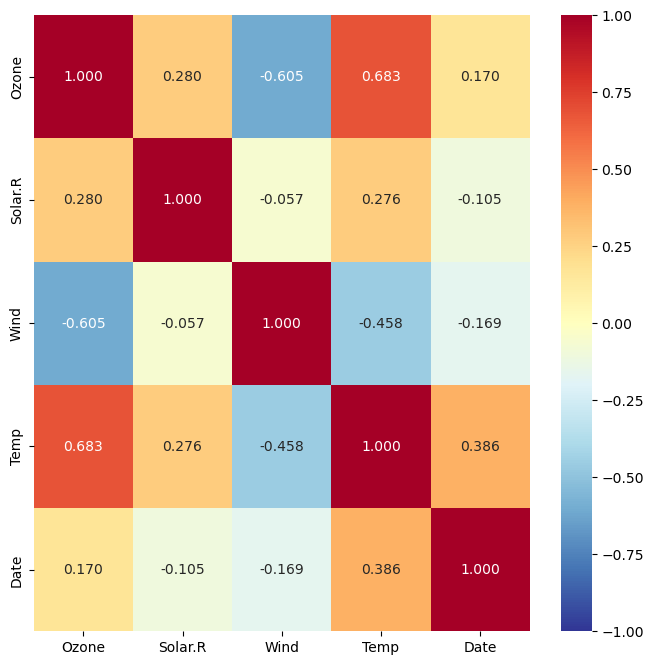

In [40]:
plt.figure(figsize = (8, 8))
sns.heatmap(air.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
plt.show()

칼라를 변경하려면 아래 링크로 가서 color map 을 확인하고 조정하세요.  
cmap(color map) : https://matplotlib.org/stable/tutorials/colors/colormaps.html

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

* 다음의 변수에 대해서 상관분석을 수행하시오.

* [문1] Temp --> Ozone 

In [45]:
spst.pearsonr(air['Temp'],air['Ozone'])

PearsonRResult(statistic=0.6833717861490114, pvalue=2.197769800200284e-22)

In [65]:
result = spst.pearsonr(air['Temp'], air['Ozone'])
print(f'r : {result[0]}')
print(f'pv : {result[1]}')

r : 0.6833717861490114
pv : 2.197769800200284e-22


* [문2] Wind --> Ozone 

In [47]:
spst.pearsonr(air['Wind'],air['Ozone'])

PearsonRResult(statistic=-0.6054782354684075, pvalue=1.1255146087637916e-16)

* [문3] Solar.R --> Ozone 
    * 단, Solar.R 에는 NaN이 있습니다. NaN을 제외(.notnull())하고, 상관분석을 수행하시오.

In [67]:
temp = air.loc[air['Solar.R'].notna()]

In [69]:
result = spst.pearsonr(temp['Solar.R'], temp['Ozone'])
print(f'r : {result[0]}')
print(f'pv : {result[1]}')

r : 0.2800681334905377
pv : 0.0006175878788566504


나:pvalue는 0.5보다 작으면 두 변수간에 관계가 있다고 본다. 그러나 위의 모든 관계는 0.5보다 크므로 모두 관계가 있다고 보기에는 어렵다

선생님: 

## **4.복습문제**

* 보스톤 집값 데이터를 이용하여 다음의 복습문제를 풀어 봅시다.

* **변수설명**
> * **medv**  : 1978 보스턴 주택 가격, 506개 타운의 주택 가격 중앙값 (단위 1,000 달러) <== **Target**
> * **crim** :	범죄율
> * **zn** :	25,000 평방피트를 초과 거주지역 비율
> * **indus** :	비소매상업지역 면적 비율
> * **chas** :	찰스강변 위치(범주 : 강변1, 아니면 0)
> * **nox** :	일산화질소 농도
> * **rm** :	주택당 방 수
> * **age** :	1940년 이전에 건축된 주택의 비율
> * **dis** :	직업센터의 거리
> * **rad** :	방사형 고속도로까지의 거리
> * **tax** :	재산세율
> * **ptratio** :	학생/교사 비율
> * **lstat** :	인구 중 하위 계층 비율


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

In [73]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


선생님 코드

In [117]:
def eda_2_nn(data, x, y):
result = spst.pearsonr(data[x], data[y])
print(f'r : {result[0]}')
print(f'pv : {result[1]}')
sns.scatterplot(x = x, y = y, data = data)
plt.grid()
plt.show()

IndentationError: expected an indented block after function definition on line 1 (3525298779.py, line 2)

* 1) crim(범죄율) --> medv(집값) 에 대해 시각화와 수치화(상관분석)을 수행후 관계를 평가하시오.

In [77]:
spst.pearsonr(boston['crim'],boston['medv'])

PearsonRResult(statistic=-0.3883046085868116, pvalue=1.1739870821943826e-19)

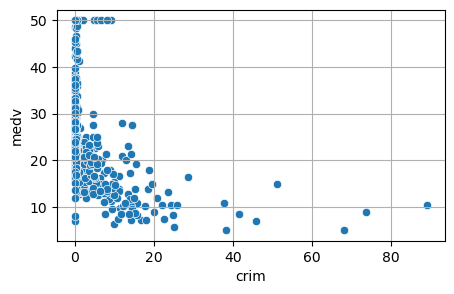

In [87]:
plt.figure(figsize = (5,3))
sns.scatterplot( x= 'crim', y = 'medv', data = boston)
plt.grid()

나:pvalue의 절대값이 1.1로 0.5보다 훨씬 높으며 시각화한 결과 뚜렷한 대각선이 없으므로 이 둘의 상관관계는 그다지 높아보이지 않음

선생님: 보면 medv 집값이 높을수록 범죄율이 현저히 낮음을 볼 수 있다. 범죄율이 일정 이상 높으면 집값은 별로 영향이 없다. 그냥 범죄율이 있으면 집값이 대체적으로 낮음을 볼 수 있다. 이걸 보면 어느정도 영향이 있음을 볼 수 있다.
음의 상관관계가 있다. 강하진 않지만 0.38.....이고 pvalue는 pvalue=1.1739870821943826e-19 보면 e-19는 10의 -19승이므로 어느정도 0.5에 수렴한다.

* 2) tax(제산세율) --> medv(집값) 에 대해 시각화와 수치화(상관분석)을 수행후 관계를 평가하시오.

In [94]:
spst.pearsonr(boston['tax'],boston['medv'])

PearsonRResult(statistic=-0.4685359335677671, pvalue=5.637733627690444e-29)

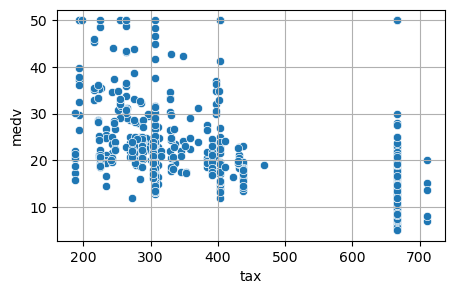

In [92]:
plt.figure(figsize = (5,3))
sns.scatterplot( x= 'tax', y = 'medv', data = boston)
plt.grid()

상관계수가 1과 사이가 멀고, pvalue 또한 0.5에서 많이 벗어난 수치로 둘이 관계가 전혀 없음

* 3) lstat(하위계층비율) --> mdev(집값) 에 대해 시각화와 수치화(상관분석)을 수행후 관계를 평가하시오.

In [98]:
spst.pearsonr(boston['lstat'],boston['medv'])

PearsonRResult(statistic=-0.7376627261740148, pvalue=5.081103394387554e-88)

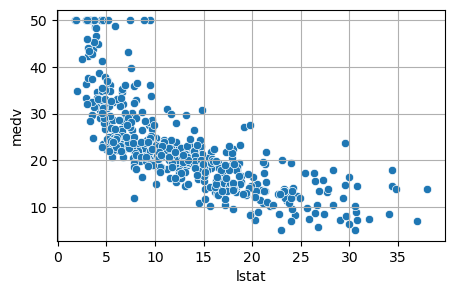

In [96]:
plt.figure(figsize = (5,3))
sns.scatterplot( x= 'lstat', y = 'medv', data = boston)
plt.grid()

상관계수가 1과 나름 가장 가까우나, pvalue가 0.5보다 훨씬 벗어난 수치이나, 시각화를 해보니 대각선이 살짝 보이며 다른 관계보다 가장 강해보임

선생님: 당연한 결과다 하위계층이 많을수록 집값이 떨어진다? 라기 보다는 하위계층은 돈이 없으므로 집을 사는데도 상위 계층보다는 저렴한 집에서 살 수밖에 없다. 즉, 하위계층이 많을수록 집값이 떨어져보이는 것은 당연한 결과다

* 4. ptratio(교사1인당 학생수) --> medv(집값) 에 대해 시각화와 수치화(상관분석)을 수행후 관계를 평가하시오.

In [108]:
spst.pearsonr(boston['ptratio'],boston['medv'])

PearsonRResult(statistic=-0.507786685537562, pvalue=1.6095094784727943e-34)

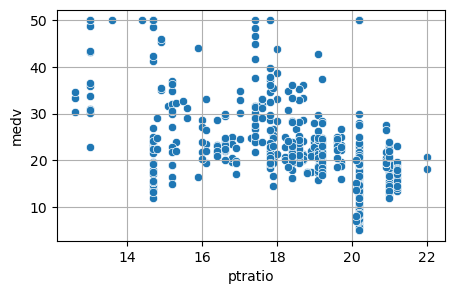

In [110]:
plt.figure(figsize = (5,3))
sns.scatterplot( x= 'ptratio', y = 'medv', data = boston)
plt.grid()

나:상관계수가 1에서 떨어져있으며, pvalue 또한 0.5에서 많이 벗어난 수치이므로 관련이 없다. 시각화해서 봐도 대각선이 보이지 않고 넓게 분포되어있다.

상관계수 비교 지표: 0.5 <= |r|<=1  이면 강한 관계이다. 
그런데 시각화해서 보니 직선이 보이지 않는다. 그룹별로 나뉘어서 보면 상관관계가 있다고 볼 수 있다.
여기서 ptratio(교사1인당 학생수)가 20에 보면 일자로 쭈루룩 모여있다는 것을 볼 수 있다. 왜 그럴까? 공립학교가 있기 때문이다.

* 4) 전체 변수들끼리의 상관계수를 구하고, 가장 강한 상관관계와 가장 약한 상관관계를 찾아 봅시다.

가장 강한 상관관계는 하위계층 비율과 집값의 관계가 가장 강하다

가장 약한 상관관계는 재산세율이 집값과의 관계가 가장 약하다

이를 분석하기 전의 나의 예상은 집값이 범죄율과 가장 높은 관련이 있을 줄 알았는데 상관계수를 구하고 보니 나의 예상과는 달라 조금 놀랐다